<a href="https://colab.research.google.com/github/jcarvaj18643/universidad-Taller1-Recomendacion/blob/main/Perceptron_Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

In [26]:
##https://nuelgaloproductos.s3.amazonaws.com/perceptron/heart_failure_clinical_records_dataset.csv
data = pd.read_csv('https://nuelgaloproductos.s3.amazonaws.com/perceptron/heart_failure_clinical_records_dataset.csv')

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [27]:
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']


DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


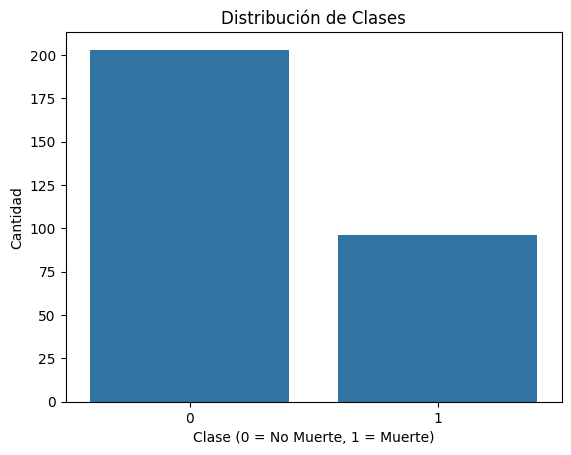

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de cada clase en la variable objetivo (Death Event)
class_counts = y.value_counts()
print(class_counts)

# Visualizar el desbalanceo
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribución de Clases')
plt.xlabel('Clase (0 = No Muerte, 1 = Muerte)')
plt.ylabel('Cantidad')
plt.show()

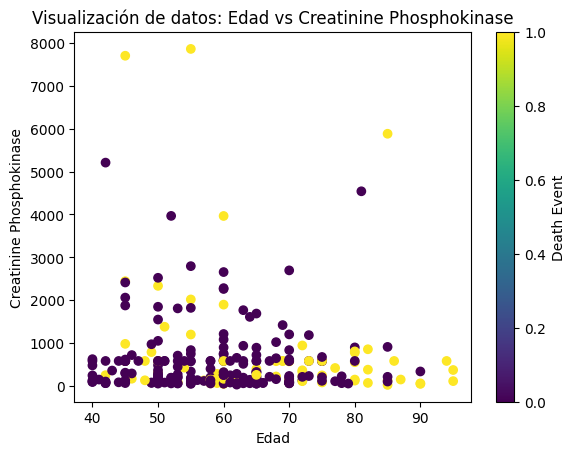

In [28]:
import matplotlib.pyplot as plt

# Seleccionamos dos características (por ejemplo, edad y creatinine_phosphokinase)
X_viz = X[['age', 'creatinine_phosphokinase']].values

# Crear gráfico de dispersión
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y, cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Creatinine Phosphokinase')
plt.title('Visualización de datos: Edad vs Creatinine Phosphokinase')
plt.colorbar(label='Death Event')
plt.show()

In [29]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)

Perceptron()

In [30]:
clf.score(X, y)

0.6789297658862876

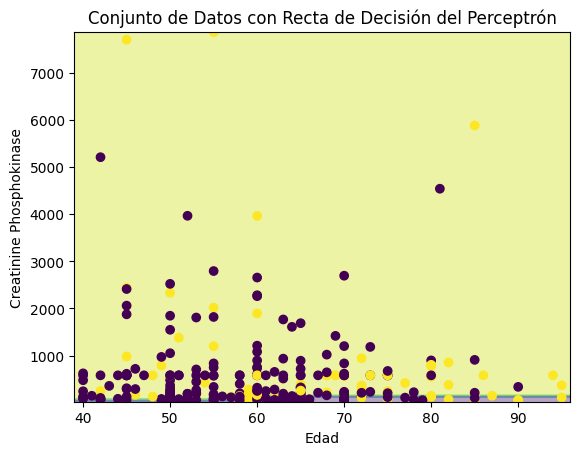

In [31]:
X_viz = X[['age', 'creatinine_phosphokinase']].values

# Entrenar nuevamente el modelo Perceptron con estas dos características
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_viz, y)

# Crear una malla de puntos para representar la recta de decisión
xx1, yy1 = np.meshgrid(np.linspace(X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1, 100),
                     np.linspace(X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1, 100))

# Predecir las etiquetas para cada punto de la malla
Z = clf.predict(np.c_[xx1.ravel(), yy1.ravel()])
Z = Z.reshape(xx1.shape)

# Dibujar la recta de decisión
plt.contourf(xx1, yy1, Z, alpha=0.4)

# Dibujar los puntos de datos
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y, cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Creatinine Phosphokinase')
plt.title('Conjunto de Datos con Recta de Decisión del Perceptrón')
plt.show()

**Logistic Regresion**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar el modelo de regresión logística con más iteraciones
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_scaled, y)

# Ver el puntaje de precisión
accuracy = clf.score(X_scaled, y)
print(f"Precisión del modelo de Regresión Logística: {accuracy * 100:.2f}%")

Precisión del modelo de Regresión Logística: 85.28%


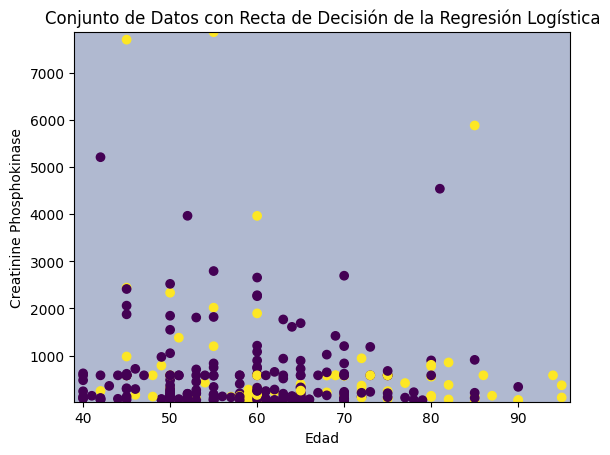

In [33]:
# Seleccionamos solo dos características para la visualización (ej: 'age' y 'creatinine_phosphokinase')
X_viz = X[['age', 'creatinine_phosphokinase']].values
X_viz_scaled = scaler.fit_transform(X_viz)

# Entrenar nuevamente el modelo de regresión logística con las dos características
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_viz_scaled, y)

# Crear una malla de puntos para representar la recta de decisión
xx, yy = np.meshgrid(np.linspace(X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1, 100),
                     np.linspace(X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1, 100))

# Predecir las etiquetas para cada punto de la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la recta de decisión
plt.contourf(xx, yy, Z, alpha=0.4)

# Dibujar los puntos de datos
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y, cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Creatinine Phosphokinase')
plt.title('Conjunto de Datos con Recta de Decisión de la Regresión Logística')
plt.show()

**Volver a empezar**

In [34]:
data = pd.read_csv('https://nuelgaloproductos.s3.amazonaws.com/perceptron/heart_failure_clinical_records_dataset.csv')

X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']


# **Normalizacion de los valores en la misma escala**

In [37]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)

# Verificamos los datos normalizados
print("Datos normalizados:")
print(X_scaled[:5])

Datos normalizados:
[[ 1.19294523e+00 -8.71104775e-01  1.65728387e-04 -8.47579380e-01
  -1.53055953e+00  1.35927151e+00  1.68164843e-02  4.90056987e-01
  -1.50403612e+00  7.35688190e-01 -6.87681906e-01 -1.62950241e+00]
 [-4.91279276e-01 -8.71104775e-01  7.51463953e+00 -8.47579380e-01
  -7.07675018e-03 -7.35688190e-01  7.53566018e-09 -2.84552352e-01
  -1.41976151e-01  7.35688190e-01 -6.87681906e-01 -1.60369074e+00]
 [ 3.50832977e-01 -8.71104775e-01 -4.49938761e-01 -8.47579380e-01
  -1.53055953e+00 -7.35688190e-01 -1.03807313e+00 -9.09000174e-02
  -1.73104612e+00  7.35688190e-01  1.45416070e+00 -1.59078490e+00]
 [-9.12335403e-01  1.14796753e+00 -4.86071002e-01 -8.47579380e-01
  -1.53055953e+00 -7.35688190e-01 -5.46474088e-01  4.90056987e-01
   8.50338444e-02  7.35688190e-01 -6.87681906e-01 -1.59078490e+00]
 [ 3.50832977e-01  1.14796753e+00 -4.35485864e-01  1.17983050e+00
  -1.53055953e+00 -7.35688190e-01  6.51798584e-01  1.26466633e+00
  -4.68217606e+00 -1.35927151e+00 -6.87681906e-01 -1

In [38]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verificamos las dimensiones de los conjuntos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (239, 12)
Tamaño de X_test: (60, 12)
Tamaño de y_train: (239,)
Tamaño de y_test: (60,)


                     Feature  Coefficient
7           serum_creatinine     0.727839
0                        age     0.655280
3                   diabetes     0.164332
2   creatinine_phosphokinase     0.113132
10                   smoking     0.071764
1                    anaemia    -0.051719
5        high_blood_pressure    -0.061112
6                  platelets    -0.176233
8               serum_sodium    -0.259614
9                        sex    -0.361586
4          ejection_fraction    -0.888779
11                      time    -1.638204


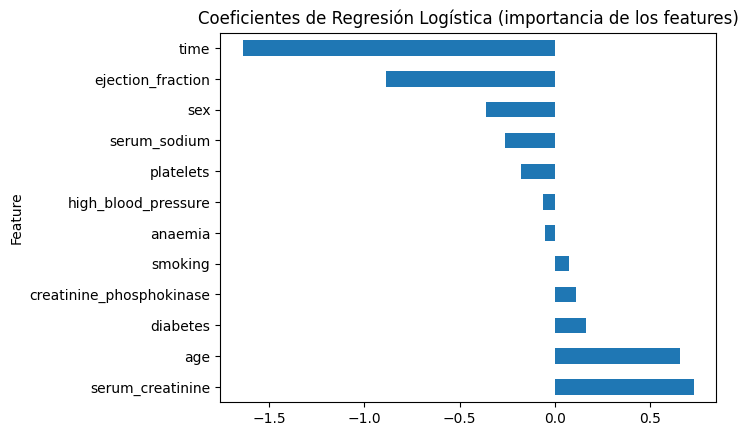

In [39]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo de Regresión Logística
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)

# Ver los coeficientes del modelo para cada característica
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': clf.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

# Visualizar las características más importantes
coefficients.plot(kind='barh', x='Feature', y='Coefficient', legend=False)
plt.title('Coeficientes de Regresión Logística (importancia de los features)')
plt.show()

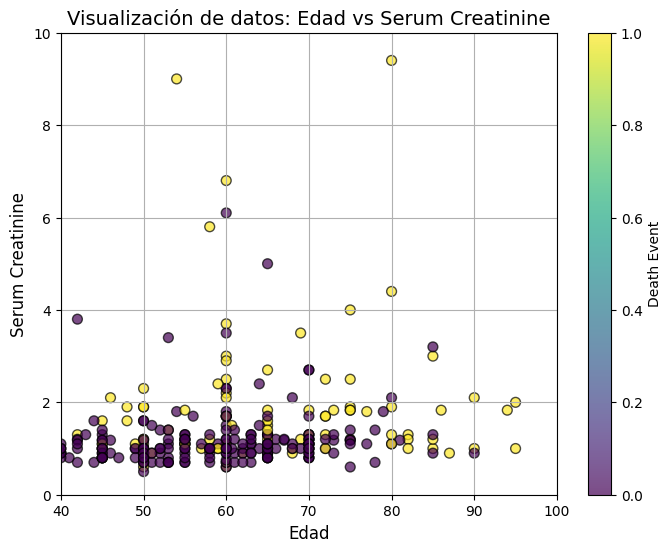

In [42]:
import matplotlib.pyplot as plt

# Crear gráfico de dispersión con mejoras visuales
plt.figure(figsize=(8, 6))
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

# Configurar etiquetas y título
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Serum Creatinine', fontsize=12)
plt.title('Visualización de datos: Edad vs Serum Creatinine', fontsize=14)

# Añadir colorbar
plt.colorbar(label='Death Event')

# Mejorar los límites de los ejes
plt.xlim([40, 100])
plt.ylim([0, 10])

plt.grid(True)
plt.show()

**Clasificacion de datos con Perceptron**

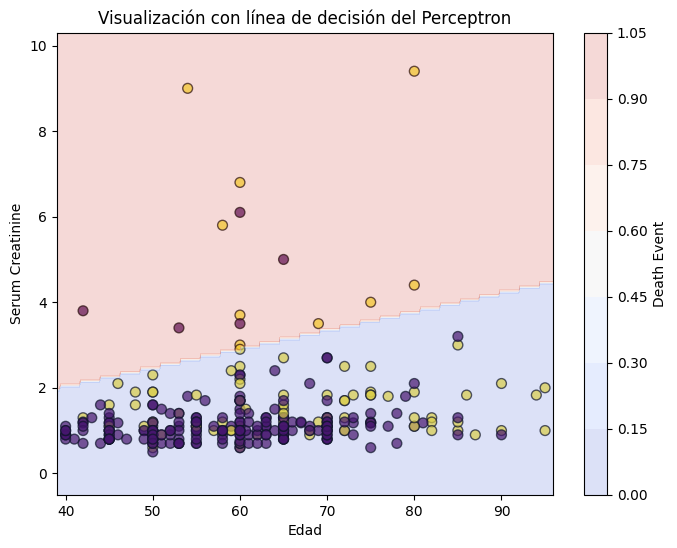

In [41]:
from sklearn.linear_model import Perceptron
import numpy as np

# Seleccionar las dos mejores características
X_viz = X[['age', 'serum_creatinine']].values

# Entrenar el modelo de Perceptron
perceptron_model = Perceptron(tol=1e-3, random_state=0)
perceptron_model.fit(X_viz, y)

# Crear una malla de puntos para visualizar la frontera de decisión
x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predecir en cada punto de la malla
Z = perceptron_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los puntos de datos
plt.figure(figsize=(8, 6))
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

# Dibujar la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

plt.xlabel('Edad')
plt.ylabel('Serum Creatinine')
plt.title('Visualización con línea de decisión del Perceptron')
plt.colorbar(label='Death Event')
plt.show()

**Clasificacion de datos con Regresion Logistica**

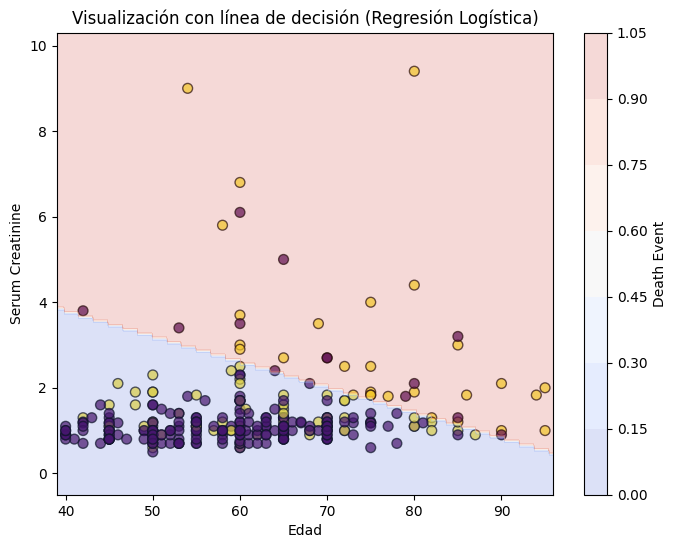

In [47]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Seleccionar las dos mejores características: 'age' y 'serum_creatinine'
X_viz = X[['age', 'serum_creatinine']].values

# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression()
log_reg.fit(X_viz, y)

# Crear una malla de puntos para visualizar la frontera de decisión
x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predecir en cada punto de la malla
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los puntos de datos
plt.figure(figsize=(8, 6))
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

# Dibujar la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

plt.xlabel('Edad')
plt.ylabel('Serum Creatinine')
plt.title('Visualización con línea de decisión (Regresión Logística)')
plt.colorbar(label='Death Event')
plt.show()


**Generacion del Modelo Perceptron**

In [44]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X[['age', 'serum_creatinine']], y, test_size=0.2, random_state=42)

# Entrenar el modelo Perceptron
perceptron_model = Perceptron(tol=1e-3, random_state=0)
perceptron_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = perceptron_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Perceptron: {accuracy * 100:.2f}%")

Precisión del modelo Perceptron: 41.67%


In [45]:
with open('perceptron_model.pkl', 'wb') as f:
    pickle.dump(perceptron_model, f)

**Generacion del Modelo Regresion Logistica**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X[['age', 'serum_creatinine']], y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo de Regresión Logística: {accuracy * 100:.2f}%")

Precisión del modelo de Regresión Logística: 63.33%


In [48]:
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(logistic_model, f)

**Balanceo de Clases y ajuste de hiperparametros**

In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X[['age', 'serum_creatinine']], y)

# Dividir los datos balanceados en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entrenar el modelo Perceptron
perceptron_model = Perceptron(tol=1e-3, random_state=0)
perceptron_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = perceptron_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Perceptron con SMOTE: {accuracy * 100:.2f}%")

Precisión del modelo Perceptron con SMOTE: 50.00%


In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pickle

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X[['age', 'serum_creatinine']], y)

# Dividir los datos balanceados en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Definir los hiperparámetros a probar
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 3000],
    'eta0': [1.0, 0.1, 0.01],  # Tasa de aprendizaje inicial
    'fit_intercept': [True, False]
}

# Crear el modelo Perceptron
perceptron = Perceptron()

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=perceptron, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar con los datos balanceados
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del mejor modelo Perceptron con SMOTE: {accuracy * 100:.2f}%")


Mejores hiperparámetros: {'alpha': 0.01, 'eta0': 0.1, 'fit_intercept': True, 'max_iter': 1000, 'penalty': 'elasticnet'}
Precisión del mejor modelo Perceptron con SMOTE: 50.00%


In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pickle

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X[['age', 'serum_creatinine']], y)

# Dividir los datos balanceados en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Definir los hiperparámetros a probar
param_grid = [
    {'penalty': ['l2'], 'C': [0.1, 1.0, 10], 'solver': ['lbfgs'], 'max_iter': [100, 200, 500]},
    {'penalty': ['l1', 'l2'], 'C': [0.1, 1.0, 10], 'solver': ['liblinear'], 'max_iter': [100, 200, 500]},
    {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.1, 1.0, 10], 'solver': ['saga'], 'max_iter': [100, 200, 500], 'l1_ratio': [0.5]}
]

# Crear el modelo de Regresión Logística
logistic_model = LogisticRegression()

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar con los datos balanceados
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el mejor modelo
best_logistic_model = grid_search.best_estimator_
y_pred = best_logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del mejor modelo de Regresión Logística con SMOTE: {accuracy * 100:.2f}%")


Mejores hiperparámetros: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Precisión del mejor modelo de Regresión Logística con SMOTE: 67.07%


In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score
import numpy as np

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X[['age', 'serum_creatinine']], y)

# Crear los clasificadores
clf1 = LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs')
clf2 = Perceptron(max_iter=1000, tol=1e-3)

# Configurar Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluar con Cross-Validation para Regresión Logística
log_reg_scores = cross_val_score(clf1, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(f"Precisión media del modelo de Regresión Logística con Cross-Validation: {np.mean(log_reg_scores) * 100:.2f}%")

# Evaluar con Cross-Validation para Perceptron
perc_scores = cross_val_score(clf2, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(f"Precisión media del modelo Perceptron con Cross-Validation: {np.mean(perc_scores) * 100:.2f}%")



Precisión media del modelo de Regresión Logística con Cross-Validation: 66.94%
Precisión media del modelo Perceptron con Cross-Validation: 50.26%


In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import numpy as np

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Definir el modelo de Regresión Logística con búsqueda de hiperparámetros
param_grid = [
    {'penalty': ['l2'], 'C': [0.1, 1.0,5.0, 10], 'solver': ['lbfgs'], 'max_iter': [100, 200, 500, 10000]},
    {'penalty': ['l1', 'l2'], 'C': [0.1, 1.0,5.0, 10], 'solver': ['liblinear'], 'max_iter': [100, 200, 500, 10000]},
    {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.1, 1.0,5.0, 10], 'solver': ['saga'], 'max_iter': [100, 200, 500, 10000], 'l1_ratio': [0.5]}
]

clf = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(X_resampled, y_resampled)

# Imprimir los mejores parámetros encontrados
print(f"Mejores hiperparámetros: {clf.best_params_}")

# Predecir probabilidades en el conjunto de prueba
y_prob = clf.predict_proba(X_test)[:, 1]

# Ajustar el umbral de decisión (por ejemplo, 0.3 en lugar de 0.5)
threshold = 0.3
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Evaluar el modelo con el umbral ajustado
print(classification_report(y_test, y_pred_adjusted))


Mejores hiperparámetros: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        53
           1       0.65      0.76      0.70        37

    accuracy                           0.73        90
   macro avg       0.73      0.74      0.73        90
weighted avg       0.74      0.73      0.74        90



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
best_logistic_model.fit(X_train, y_train)

# Evaluamos el modelo en los datos de prueba
score = best_logistic_model.score(X_test, y_test)
print(f"Precisión del modelo en los datos de prueba: {score * 100:.2f}%")

# Guardamos el modelo en un archivo pickle
with open('best_logistic_model.pkl', 'wb') as f:
    pickle.dump(best_logistic_model, f)

print("Modelo guardado como 'best_logistic_model.pkl'.")

Precisión del modelo en los datos de prueba: 80.00%
Modelo guardado como 'best_logistic_model.pkl'.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


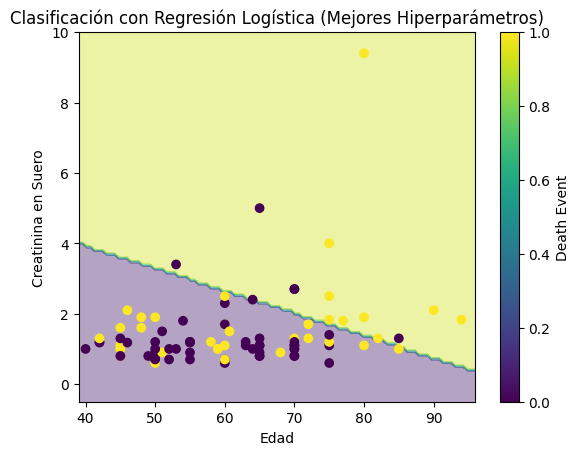

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que estás usando solo dos características para graficar
X_train_2d = X_train[['age', 'serum_creatinine']].values  # O las características que prefieras
X_test_2d = X_test[['age', 'serum_creatinine']].values

# Volvemos a entrenar el modelo con solo esas dos características
best_logistic_model.fit(X_train_2d, y_train)

# Crear una malla de puntos para representar la recta de decisión
xx, yy = np.meshgrid(np.linspace(X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1, 100),
                     np.linspace(X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1, 100))

# Predecir las etiquetas para cada punto de la malla
Z = best_logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la recta de decisión
plt.contourf(xx, yy, Z, alpha=0.4)

# Dibujar los puntos de datos
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Creatinina en Suero')
plt.title('Clasificación con Regresión Logística (Mejores Hiperparámetros)')
plt.colorbar(label='Death Event')
plt.show()

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

data = pd.read_csv('https://nuelgaloproductos.s3.amazonaws.com/perceptron/heart_failure_clinical_records_dataset.csv')

# Supongo que df es tu DataFrame con los datos
X = data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
        'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']].values
y = data['DEATH_EVENT'].values

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo Adaline usando SGDClassifier con 'squared_error'
adaline = SGDClassifier(loss='squared_error', max_iter=1000, tol=1e-3, random_state=42)

# Entrenamos el modelo
adaline.fit(X_train, y_train)


# Evaluamos el modelo
score = adaline.score(X_test, y_test)
print(f"Precisión del modelo Adaline: {score * 100:.2f}%")

Precisión del modelo Adaline: 36.67%
